In [2]:
pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 12.3 MB/s eta 0:00:00


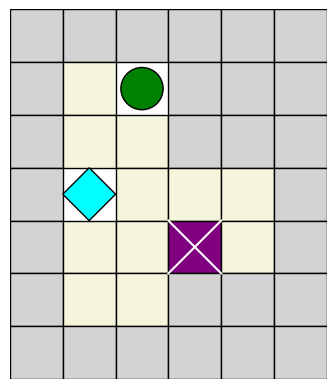

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Polygon

class SokobanEnvironment:
    def __init__(self):
        self.grid = [
            [1, 1, 1, 1, 1, 1],
            [1, 0, 0, 1, 1, 1],
            [1, 0, 0, 1, 1, 1],
            [1, 3, 0, 0, 0, 1],
            [1, 0, 0, 2, 0, 1],
            [1, 0, 0, 1, 1, 1],
            [1, 1, 1, 1, 1, 1],
        ]
        self.agent_position = (1, 2)
        self.box_positions = [(4, 3)]
        self.storage_positions = [(3, 1)]
        self.actions = {
            "UP": (-1, 0),
            "DOWN": (1, 0),
            "LEFT": (0, -1),
            "RIGHT": (0, 1)
        }
        self.done = False

    def display_grid(self):
        """Graphical display of the grid with a new color scheme and shapes."""
        fig, ax = plt.subplots()

        for row in range(len(self.grid)):
            for col in range(len(self.grid[row])):
                if self.grid[row][col] == 1:
                    ax.add_patch(Rectangle((col, row), 1, 1, edgecolor='black', facecolor='lightgray'))
                elif (row, col) == self.agent_position:t
                    ax.add_patch(Circle((col + 0.5, row + 0.5), 0.4, edgecolor='black', facecolor='green'))
                elif (row, col) in self.box_positions:
                    ax.add_patch(Rectangle((col, row), 1, 1, edgecolor='black', facecolor='purple'))
                    ax.plot([col, col + 1], [row, row + 1], color='white')
                    ax.plot([col, col + 1], [row + 1, row], color='white')
                elif (row, col) in self.storage_positions:
                    diamond = Polygon([[col + 0.5, row], [col + 1, row + 0.5], [col + 0.5, row + 1], [col, row + 0.5]],
                                      edgecolor='black', facecolor='cyan')
                    ax.add_patch(diamond)
                else:
                    ax.add_patch(Rectangle((col, row), 1, 1, edgecolor='black', facecolor='beige'))

        ax.set_xlim(0, len(self.grid[0]))
        ax.set_ylim(0, len(self.grid))
        ax.set_aspect('equal')
        plt.gca().invert_yaxis()  # Keeping the origin at the top-left for visual consistency
        plt.axis('off')  # Removing axes for a cleaner look
        plt.show()

    def reset(self):
        self.agent_position = (1, 2)
        self.box_positions = [(4, 3)]
        self.done = False

if __name__ == "__main__":
    env = SokobanEnvironment()
    env.display_grid()